In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
# Assuming the dataset is in a CSV file named 'winequality.csv'
df = pd.read_csv(r'C:\Users\DELL\Downloads\WineQT.csv')

In [5]:
print(df.isnull().sum())

# If there are missing values, we can handle them by dropping or imputing
# For this example, we'll drop any rows with missing values
df = df.dropna()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [6]:
# Encode the target variable
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

In [7]:
# Split features and target
X = df.drop('quality', axis=1)
y = df['quality']

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [10]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6026


In [13]:
# If target_names is not needed
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         6
           2       0.78      0.56      0.65        96
           3       0.59      0.69      0.64        99
           4       0.47      0.62      0.53        26
           5       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.31      0.31      0.30       229
weighted avg       0.64      0.60      0.61       229



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [14]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

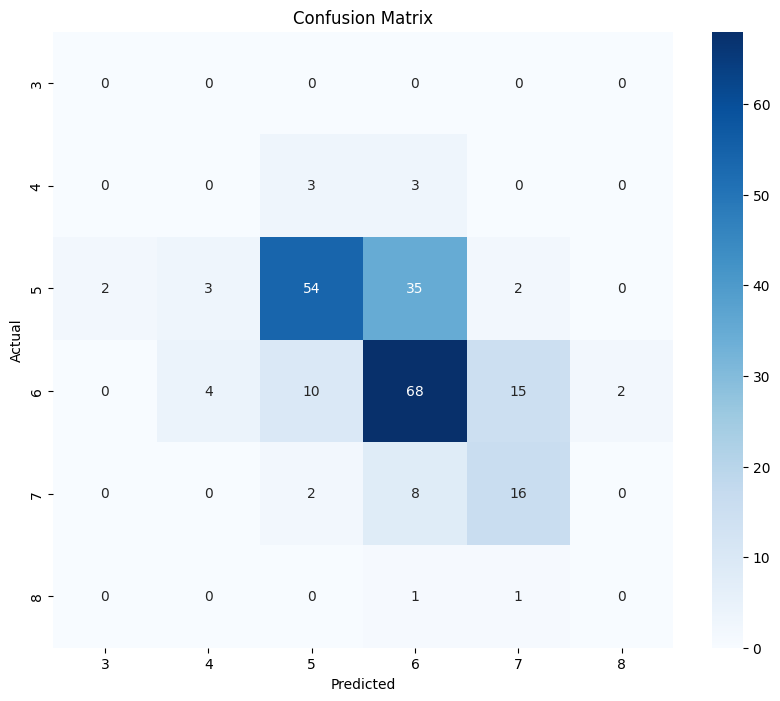

In [15]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Calculate class-wise accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(class_accuracy):
    print(f"Accuracy for class {le.classes_[i]}: {acc:.4f}")

Accuracy for class 3: nan
Accuracy for class 4: 0.0000
Accuracy for class 5: 0.5625
Accuracy for class 6: 0.6869
Accuracy for class 7: 0.6154
Accuracy for class 8: 0.0000


C:\Users\DELL\AppData\Local\Temp\ipykernel_34188\2716728583.py:2: RuntimeWarning: invalid value encountered in divide
  class_accuracy = cm.diagonal() / cm.sum(axis=1)


In [17]:
# Feature importance (using mean feature probabilities)
feature_importance = gnb.theta_.mean(axis=0)
feature_names = X.columns
for name, importance in zip(feature_names, feature_importance):
    print(f"Importance of {name}: {importance:.4f}")

Importance of fixed acidity: 8.3395
Importance of volatile acidity: 0.5806
Importance of citric acid: 0.2785
Importance of residual sugar: 2.5726
Importance of chlorides: 0.0866
Importance of free sulfur dioxide: 13.2892
Importance of total sulfur dioxide: 37.5809
Importance of density: 0.9966
Importance of pH: 3.3199
Importance of sulphates: 0.6629
Importance of alcohol: 10.6230
Importance of Id: 846.2752
